In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
stress10_df = pd.read_csv("cleaned_data/stress10-cleaned.csv")
stress25_df = pd.read_csv("cleaned_data/stress25-cleaned.csv")
stress50_df = pd.read_csv("cleaned_data/stress50-cleaned.csv")

def parse_column_to_list(df, column_name):
    return df[column_name].apply(eval)


for df in [stress10_df, stress25_df, stress50_df]:
    df['deltas'] = parse_column_to_list(df, 'deltas')
    df['accuracy'] = parse_column_to_list(df, 'accuracy')
    df['confidence'] = parse_column_to_list(df, 'confidence')
    df['answers'] = parse_column_to_list(df, 'answers')
    df['time'] = parse_column_to_list(df, 'time')

0     [10, 35, 25, 15, 40, 15, 10, 30, 5, 5, 35, 15,...
1     [0, 0, 25, 5, 40, 30, 0, 5, 10, 15, 5, 15, 30,...
2     [15, 10, 30, 15, 20, 15, 35, 25, 20, 30, 20, 1...
3     [0, 40, 20, 15, 35, 30, 20, 35, 0, 10, 10, 0, ...
4     [20, 30, 10, 25, 20, 25, 25, 0, 5, 30, 10, 5, ...
5     [0, 30, 0, 40, 10, 25, 0, 15, 5, 5, 10, 35, 30...
6     [35, 5, 30, 25, 30, 5, 5, 25, 35, 0, 15, 5, 40...
7     [10, 0, 35, 5, 10, 25, 35, 25, 30, 15, 0, 15, ...
8     [40, 15, 35, 10, 35, 5, 20, 20, 15, 0, 40, 20,...
9     [5, 5, 10, 25, 0, 35, 10, 25, 40, 30, 20, 10, ...
10    [35, 15, 30, 25, 0, 20, 10, 5, 25, 35, 0, 10, ...
11    [5, 0, 15, 0, 35, 30, 25, 30, 5, 40, 0, 5, 35,...
12    [0, 25, 15, 25, 15, 0, 5, 0, 15, 25, 40, 10, 3...
13    [40, 10, 25, 5, 0, 40, 20, 20, 20, 35, 40, 5, ...
14    [40, 25, 15, 5, 30, 5, 20, 30, 15, 35, 10, 40,...
15    [15, 0, 0, 10, 20, 30, 35, 35, 10, 20, 35, 25,...
16    [20, 5, 20, 30, 40, 40, 10, 30, 25, 35, 0, 5, ...
17    [40, 20, 10, 15, 30, 30, 0, 25, 20, 40, 15

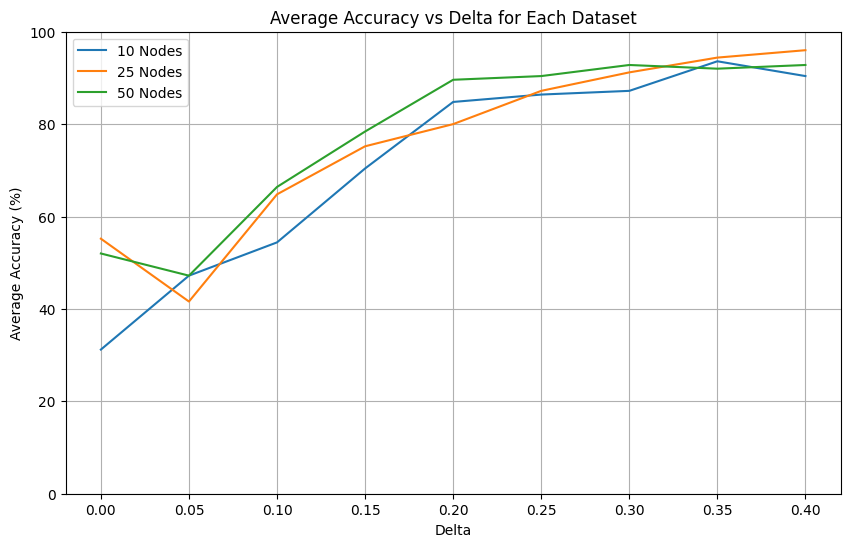

In [14]:
def compute_avg_accuracy(df):
    all_deltas = []
    all_accuracies = []
    
    for deltas, accuracies in zip(df['deltas'], df['accuracy']):
        all_deltas.extend(deltas)
        all_accuracies.extend(accuracies)
    
    # Group by deltas
    unique_deltas = sorted(set(all_deltas))
    avg_accuracy = [np.mean([a for d, a in zip(all_deltas, all_accuracies) if d == delta]) for delta in unique_deltas]
    
    return unique_deltas, avg_accuracy

x10, y10 = compute_avg_accuracy(stress10_df)
x25, y25 = compute_avg_accuracy(stress25_df)
x50, y50 = compute_avg_accuracy(stress50_df)

# Update plot with percentages and adjusted x-axis scaling
plt.figure(figsize=(10, 6))
plt.plot(np.array(x10) / 100, np.array(y10) * 100, label='10 Nodes')
plt.plot(np.array(x25) / 100, np.array(y25) * 100, label='25 Nodes')
plt.plot(np.array(x50) / 100, np.array(y50) * 100, label='50 Nodes')

# Add labels, title, and legend
plt.xlabel('Delta')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy vs Delta for Each Dataset')
plt.legend()
plt.grid(True)

# Ensure y-axis ranges from 0 to 100
plt.ylim(0, 100)

# Show the plot
plt.show()

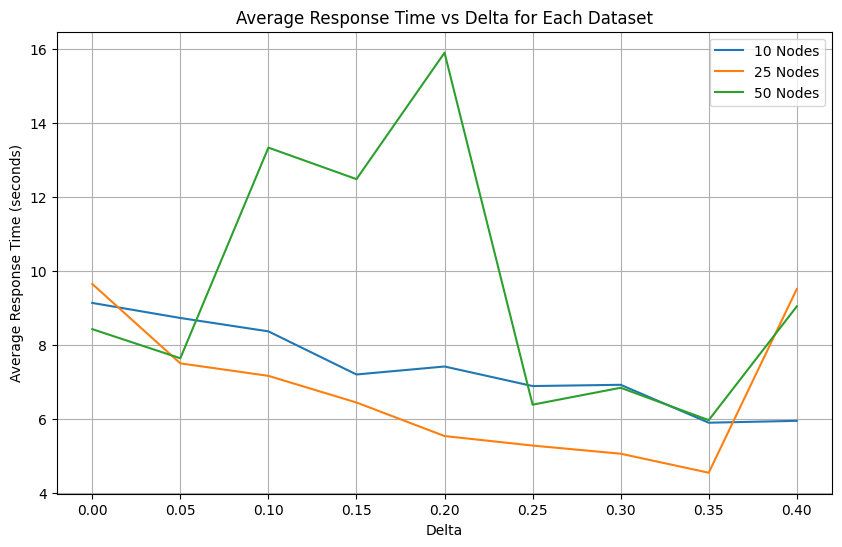

In [15]:
# Function to calculate average response time per delta
def compute_avg_response_time(df):
    all_deltas = []
    all_times = []
    
    for deltas, times in zip(df['deltas'], df['time']):
        all_deltas.extend(deltas)
        all_times.extend(times)
    
    # Group by deltas
    unique_deltas = sorted(set(all_deltas))
    avg_response_time = [np.mean([t for d, t in zip(all_deltas, all_times) if d == delta]) for delta in unique_deltas]
    
    return unique_deltas, avg_response_time


# Compute average response time for each dataset
x10_rt, y10_rt = compute_avg_response_time(stress10_df)
x25_rt, y25_rt = compute_avg_response_time(stress25_df)
x50_rt, y50_rt = compute_avg_response_time(stress50_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(x10_rt) / 100, y10_rt, label='10 Nodes')
plt.plot(np.array(x25_rt) / 100, y25_rt, label='25 Nodes')
plt.plot(np.array(x50_rt) / 100, y50_rt, label='50 Nodes')

# Add labels, title, and legend
plt.xlabel('Delta')
plt.ylabel('Average Response Time (seconds)')
plt.title('Average Response Time vs Delta for Each Dataset')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

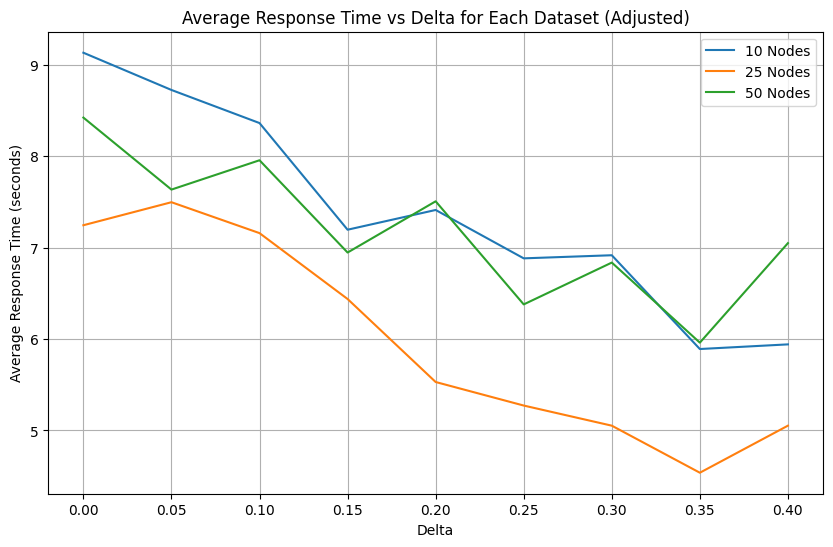

In [16]:
# Function to replace outliers with the average of other responses
def replace_outliers_with_avg(df):
    valid_times = []
    for times in df['time']:
        valid_times.extend([t for t in times if t <= 200])
    
    # Compute average of valid times
    avg_valid_time = np.mean(valid_times)
    
    # Replace outliers with the average
    df['adjusted_time'] = df['time'].apply(
        lambda x: [t if t <= 200 else avg_valid_time for t in x]
    )
    return df

# Apply the replacement to all datasets
stress10_df = replace_outliers_with_avg(stress10_df)
stress25_df = replace_outliers_with_avg(stress25_df)
stress50_df = replace_outliers_with_avg(stress50_df)

# Compute average response time per delta for adjusted data
def compute_avg_response_time_adjusted(df):
    all_deltas = []
    all_times = []
    
    for deltas, times in zip(df['deltas'], df['adjusted_time']):
        all_deltas.extend(deltas)
        all_times.extend(times)
    
    # Group by deltas
    unique_deltas = sorted(set(all_deltas))
    avg_response_time = [np.mean([t for d, t in zip(all_deltas, all_times) if d == delta]) for delta in unique_deltas]
    
    return unique_deltas, avg_response_time

# Recompute response times after replacing outliers
x10_rt, y10_rt = compute_avg_response_time_adjusted(stress10_df)
x25_rt, y25_rt = compute_avg_response_time_adjusted(stress25_df)
x50_rt, y50_rt = compute_avg_response_time_adjusted(stress50_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(x10_rt) / 100, y10_rt, label='10 Nodes')
plt.plot(np.array(x25_rt) / 100, y25_rt, label='25 Nodes')
plt.plot(np.array(x50_rt) / 100, y50_rt, label='50 Nodes')

# Add labels, title, and legend
plt.xlabel('Delta')
plt.ylabel('Average Response Time (seconds)')
plt.title('Average Response Time vs Delta for Each Dataset (Adjusted)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



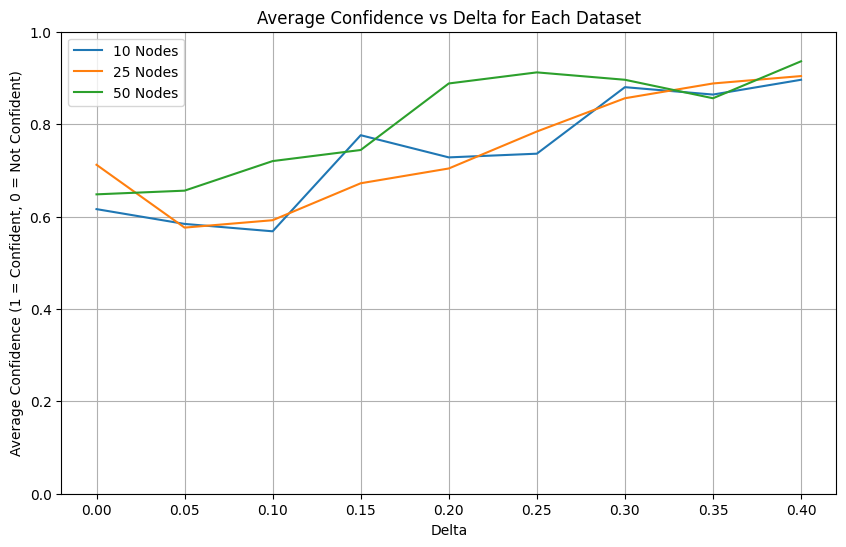

In [17]:
# Convert confidence scores: 1 -> 1 (Confident), 2 -> 0 (Not Confident)
def convert_confidence(df):
    df['adjusted_confidence'] = df['confidence'].apply(lambda x: [1 if c == 1 else 0 for c in x])
    return df

# Apply conversion to all datasets
stress10_df = convert_confidence(stress10_df)
stress25_df = convert_confidence(stress25_df)
stress50_df = convert_confidence(stress50_df)

# Compute average confidence per delta
def compute_avg_confidence(df):
    all_deltas = []
    all_confidences = []
    
    for deltas, confidences in zip(df['deltas'], df['adjusted_confidence']):
        all_deltas.extend(deltas)
        all_confidences.extend(confidences)
    
    # Group by deltas
    unique_deltas = sorted(set(all_deltas))
    avg_confidence = [np.mean([c for d, c in zip(all_deltas, all_confidences) if d == delta]) for delta in unique_deltas]
    
    return unique_deltas, avg_confidence

# Compute confidence scores for each dataset
x10_conf, y10_conf = compute_avg_confidence(stress10_df)
x25_conf, y25_conf = compute_avg_confidence(stress25_df)
x50_conf, y50_conf = compute_avg_confidence(stress50_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(x10_conf) / 100, y10_conf, label='10 Nodes')
plt.plot(np.array(x25_conf) / 100, y25_conf, label='25 Nodes')
plt.plot(np.array(x50_conf) / 100, y50_conf, label='50 Nodes')

# Add labels, title, and legend
plt.xlabel('Delta')
plt.ylabel('Average Confidence (1 = Confident, 0 = Not Confident)')
plt.title('Average Confidence vs Delta for Each Dataset')
plt.legend()
plt.ylim(0, 1)
plt.grid(True)

# Show the plot
plt.show()


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

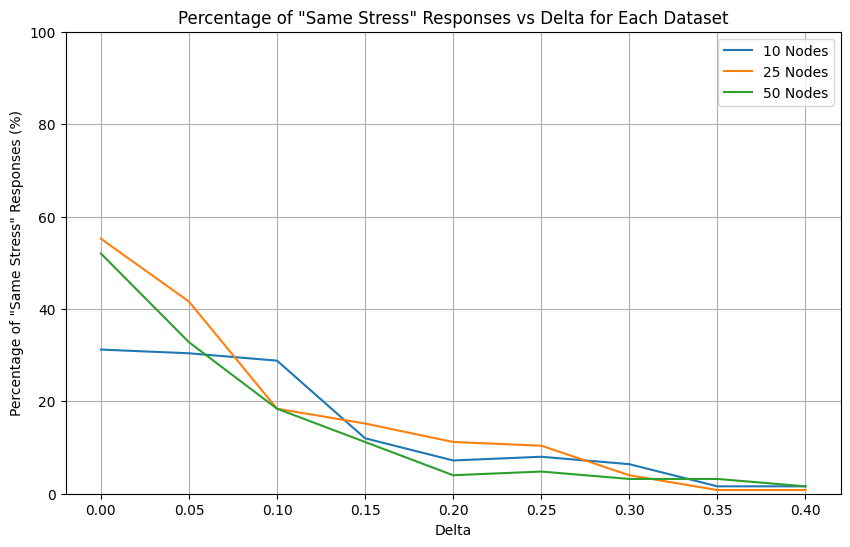

In [18]:
# Compute percentage of "same stress" (option 2) per delta
def compute_same_stress_percentage_fixed(df):
    all_deltas = []
    all_same_stress_counts = []
    
    for deltas, answers in zip(df['deltas'], df['answers']):
        all_deltas.extend(deltas)
        all_same_stress_counts.extend([1 if a == 2 else 0 for a in answers])
    
    print(all_same_stress_counts)
    # Group by deltas and calculate percentage
    unique_deltas = sorted(set(all_deltas))
    same_stress_percentage = [
        100 * sum([c for d, c in zip(all_deltas, all_same_stress_counts) if d == delta]) /
        sum([1 for d in all_deltas if d == delta])
        for delta in unique_deltas
    ]
    
    return unique_deltas, same_stress_percentage

# Recompute percentages for each dataset
x10_same, y10_same = compute_same_stress_percentage_fixed(stress10_df)
x25_same, y25_same = compute_same_stress_percentage_fixed(stress25_df)
x50_same, y50_same = compute_same_stress_percentage_fixed(stress50_df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(x10_same) / 100, y10_same, label='10 Nodes')
plt.plot(np.array(x25_same) / 100, y25_same, label='25 Nodes')
plt.plot(np.array(x50_same) / 100, y50_same, label='50 Nodes')

# Add labels, title, and legend
plt.xlabel('Delta')
plt.ylabel('Percentage of "Same Stress" Responses (%)')
plt.title('Percentage of "Same Stress" Responses vs Delta for Each Dataset')
plt.ylim(0,100)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



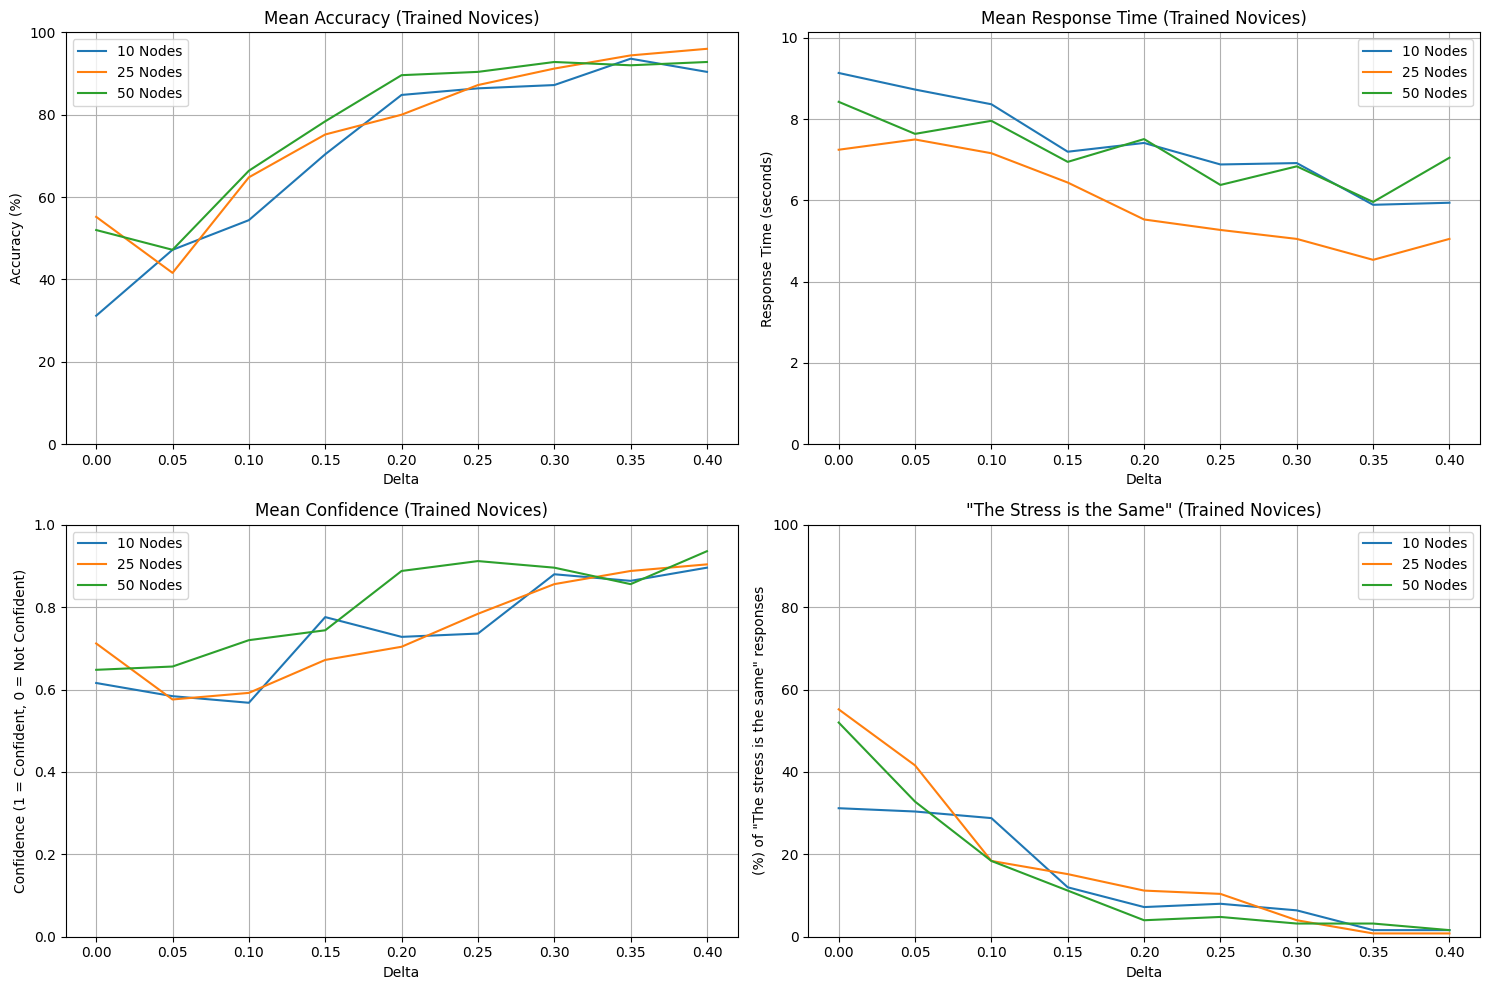

In [12]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten to iterate through axes easily

# Plot 1: Average Accuracy vs Delta
axes[0].plot(np.array(x10) / 100, np.array(y10) * 100, label='10 Nodes')
axes[0].plot(np.array(x25) / 100, np.array(y25) * 100, label='25 Nodes')
axes[0].plot(np.array(x50) / 100, np.array(y50) * 100, label='50 Nodes')
axes[0].set_title('Mean Accuracy (Trained Novices)')
axes[0].set_xlabel('Delta')
axes[0].set_ylabel('Accuracy (%)')
axes[0].legend()
axes[0].set_ylim(0,100)
axes[0].grid(True)

# Plot 2: Average Response Time vs Delta
axes[1].plot(np.array(x10_rt) / 100, y10_rt, label='10 Nodes')
axes[1].plot(np.array(x25_rt) / 100, y25_rt, label='25 Nodes')
axes[1].plot(np.array(x50_rt) / 100, y50_rt, label='50 Nodes')
axes[1].set_title('Mean Response Time (Trained Novices)')
axes[1].set_xlabel('Delta')
axes[1].set_ylabel('Response Time (seconds)')
axes[1].legend()
max_time = max(0, max(y10_rt))
max_time = max(max_time, max(y25_rt))
max_time = max(max_time, max(y50_rt)) + 1
axes[1].set_ylim(0, max_time)
axes[1].grid(True)

# Plot 3: Average Confidence vs Delta
axes[2].plot(np.array(x10_conf) / 100, y10_conf, label='10 Nodes')
axes[2].plot(np.array(x25_conf) / 100, y25_conf, label='25 Nodes')
axes[2].plot(np.array(x50_conf) / 100, y50_conf, label='50 Nodes')
axes[2].set_title('Mean Confidence (Trained Novices)')
axes[2].set_xlabel('Delta')
axes[2].set_ylabel('Confidence (1 = Confident, 0 = Not Confident)')
axes[2].legend()
axes[2].set_ylim(0,1)
axes[2].grid(True)

# Plot 4: Percentage of "Same Stress" Responses vs Delta
axes[3].plot(np.array(x10_same) / 100, y10_same, label='10 Nodes')
axes[3].plot(np.array(x25_same) / 100, y25_same, label='25 Nodes')
axes[3].plot(np.array(x50_same) / 100, y50_same, label='50 Nodes')
axes[3].set_title('"The Stress is the Same" (Trained Novices)')
axes[3].set_xlabel('Delta')
axes[3].set_ylabel('(%) of "The stress is the same" responses')
axes[3].legend()
axes[3].set_ylim(0,100)
axes[3].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined figure
plt.show()
